<a href="https://colab.research.google.com/github/BossDevinator/IS_4482/blob/main/A9_Moore_Devan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignement 9
###Devan Moore
###11/4/2024

##TASK 1:
###Data Import and Summaries

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/titanic_cleaned.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
 7   Cabin     714 non-null    object 
 8   Embarked  714 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 50.3+ KB


In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,missing,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,missing,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,missing,S


In [6]:
df_clean = df.drop('Cabin', axis=1)

In [7]:
df_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

##TASK 2:
###Standardize the Data

In [8]:
df_encoded = pd.get_dummies(df_clean, columns=['Sex', 'Embarked', 'Pclass'])

In [9]:
df_scaled = StandardScaler().fit_transform(df_encoded)
df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)

In [10]:
df_scaled.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_missing,Pclass_1,Pclass_2,Pclass_3
0,-0.82702,-0.530377,0.524570,-0.505895,-0.518978,-0.759051,0.759051,-0.471808,-0.202031,0.537409,-0.053,-0.593526,-0.565489,1.005618
1,1.20916,0.571831,0.524570,-0.505895,0.691897,1.317434,-1.317434,2.119506,-0.202031,-1.860779,-0.053,1.684847,-0.565489,-0.994413
2,1.20916,-0.254825,-0.551703,-0.505895,-0.506214,1.317434,-1.317434,-0.471808,-0.202031,0.537409,-0.053,-0.593526,-0.565489,1.005618
3,1.20916,0.365167,0.524570,-0.505895,0.348049,1.317434,-1.317434,-0.471808,-0.202031,0.537409,-0.053,1.684847,-0.565489,-0.994413
4,-0.82702,0.365167,-0.551703,-0.505895,-0.503850,-0.759051,0.759051,-0.471808,-0.202031,0.537409,-0.053,-0.593526,-0.565489,1.005618


##TASK 3:
###Elbow Method

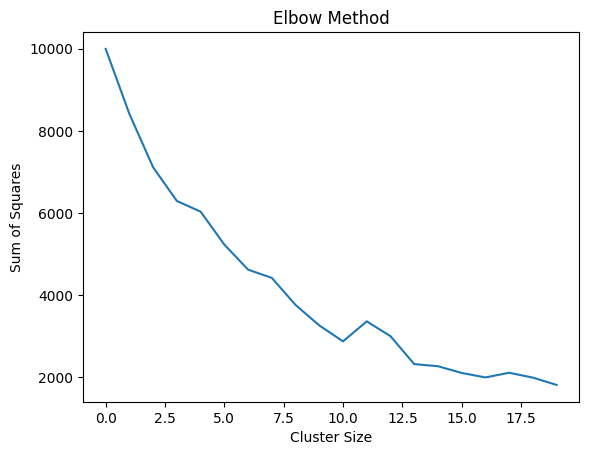

In [11]:
inertia_lst = []
model_lst = []

for i in range(1,21):
  model = KMeans(i).fit(df_scaled)
  inertia_lst.append(model.inertia_)
  model_lst.append(model)

plt.plot(inertia_lst)
plt.title('Elbow Method')
plt.xlabel('Cluster Size')
plt.ylabel('Sum of Squares')

plt.show()

In my opinion, I believe that the optimal number of clusters is between 5 and 7. The reason for this is we see the least amount of change in the elbow method. It creates a steady point to examine in relation to the sum of squares. So, moving on, I will be focusing on the optimal number of clusters as 6.

##TASK 4A:
###KMeans

In [12]:
optimal_kmeans = KMeans(n_clusters=6, random_state=13)
clusters = optimal_kmeans.fit_predict(df_scaled)

In [13]:
df_scaled['predicted_cluster'] = clusters
df_scaled.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_missing,Pclass_1,Pclass_2,Pclass_3,predicted_cluster
0,-0.82702,-0.530377,0.524570,-0.505895,-0.518978,-0.759051,0.759051,-0.471808,-0.202031,0.537409,-0.053,-0.593526,-0.565489,1.005618,3
1,1.20916,0.571831,0.524570,-0.505895,0.691897,1.317434,-1.317434,2.119506,-0.202031,-1.860779,-0.053,1.684847,-0.565489,-0.994413,0
2,1.20916,-0.254825,-0.551703,-0.505895,-0.506214,1.317434,-1.317434,-0.471808,-0.202031,0.537409,-0.053,-0.593526,-0.565489,1.005618,5
3,1.20916,0.365167,0.524570,-0.505895,0.348049,1.317434,-1.317434,-0.471808,-0.202031,0.537409,-0.053,1.684847,-0.565489,-0.994413,2
4,-0.82702,0.365167,-0.551703,-0.505895,-0.503850,-0.759051,0.759051,-0.471808,-0.202031,0.537409,-0.053,-0.593526,-0.565489,1.005618,3


##TASK 4B:
###Scatterplot

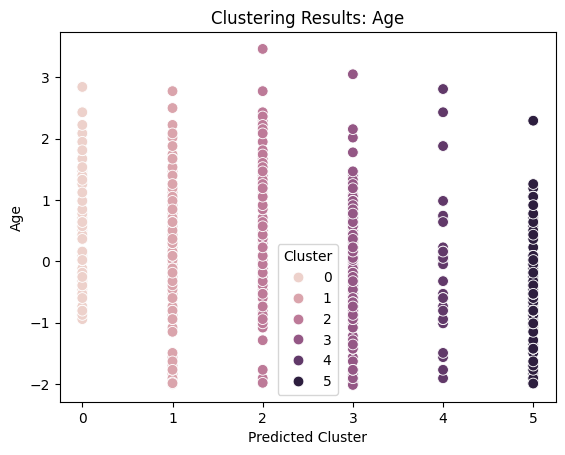

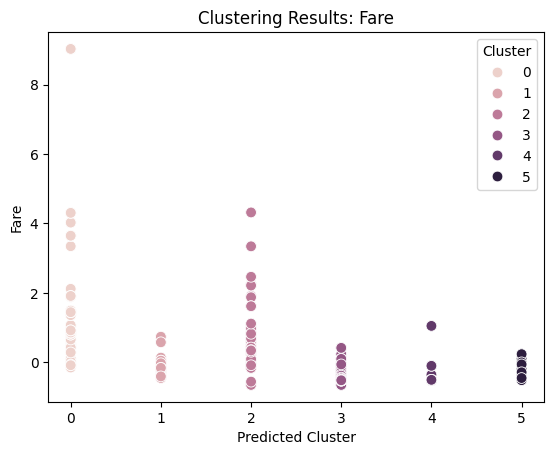

In [14]:
sns.scatterplot(y='Age', x='predicted_cluster', data=df_scaled, hue='predicted_cluster', s=60)
plt.title('Clustering Results: Age')
plt.ylabel('Age')
plt.xlabel('Predicted Cluster')
plt.legend(title='Cluster')
plt.show()

sns.scatterplot(y='Fare', x='predicted_cluster', data=df_scaled, hue='predicted_cluster', s=60)
plt.title('Clustering Results: Fare')
plt.ylabel('Fare')
plt.xlabel('Predicted Cluster')
plt.legend(title='Cluster')
plt.show()

Honestly, these scatterplots show a harder to interpret result(s) from the clusters. I believe this is due to the large amount of overlap between clusters. There is not a whole lot of seperationg between which clusters took over a majority amount of either the Fare and/or Age.

##TASK 4C:
###Boxplots

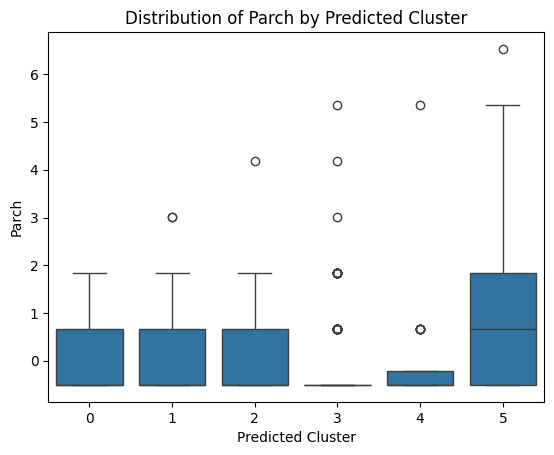

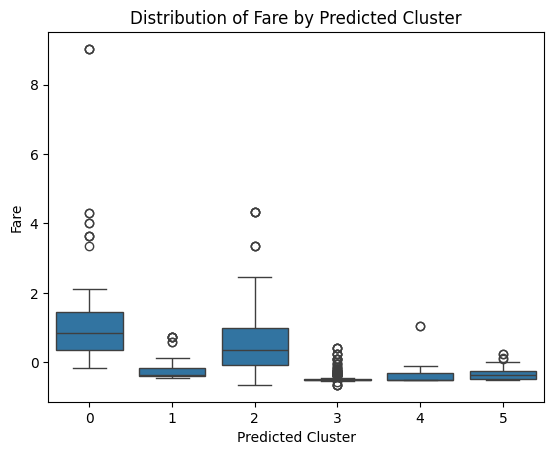

In [15]:
sns.boxplot(x='predicted_cluster', y='Parch', data=df_scaled)
plt.title('Distribution of Parch by Predicted Cluster')
plt.xlabel('Predicted Cluster')
plt.ylabel('Parch')
plt.show()

sns.boxplot(x='predicted_cluster', y='Fare', data=df_scaled)
plt.title('Distribution of Fare by Predicted Cluster')
plt.xlabel('Predicted Cluster')
plt.ylabel('Fare')
plt.show()


Again, there is quite a bit of overlapping seen here in these boxplots. It seems like there is more speration however in the age section through boxplots than through the scatterplot. It seems like in both age and fare, predicted clusters 1 (2) and 4 (5) took the lower numbers on both, helping to create a greater distinction. Also, clusters 0 (1) and 5(6) are similar with taking a greater variety of the distribution.

##TASK 5:
###PCA

In [16]:
pca = PCA(n_components=3, svd_solver='full')
pca.fit(df_scaled)

PCA(n_components=3, svd_solver='full')

Oringinally there were 15 dimensions within our dataset, with this PCA, we have reduced our dementions to the top 3 components. Making our new dataframe only hosting 3 dimensions.

In [17]:
pca_comp = pd.DataFrame(pca.components_)
pca_comp.columns = ['PC' + str(x) for x in range(1,16)]

pca_comp.columns = df_scaled.columns
pca_comp

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_missing,Pclass_1,Pclass_2,Pclass_3,predicted_cluster
0,-0.207048,-0.174240,0.071044,0.034159,-0.271394,-0.079891,0.079891,-0.236468,0.091117,0.183808,-0.058222,-0.327707,-0.163057,0.427405,0.645049
1,0.333335,-0.179058,0.198301,0.275479,0.184438,0.509708,-0.509708,0.145116,0.098285,-0.184408,0.034356,0.092550,-0.154975,0.051564,0.294695
2,0.147471,-0.092447,0.054374,0.109462,-0.149695,0.234245,-0.234245,-0.424594,-0.207205,0.492040,-0.020789,-0.238545,0.490860,-0.211244,-0.119986


In [18]:
print(pca.explained_variance_ratio_)

[0.26645038 0.17184918 0.1257702 ]


In [19]:
np.cumsum(pca.explained_variance_ratio_)

array([0.26645038, 0.43829956, 0.56406976])

In [20]:
sum(pca.explained_variance_ratio_)

0.564069763172307

We can see from the sum formula above that the top 3 components (dimensions) only explains about 56.4% of the total data.

##TASK 6:
###KMeans with PCA

In [21]:
pca_three = PCA(3)
df_scaled_pca = pca_three.fit_transform(df_scaled.drop('predicted_cluster', axis=1))

df_scaled_pca = pd.DataFrame(df_scaled_pca)
df_scaled_pca.columns = ['PC' + str(x) for x in range(1,4)]

df_scaled_pca['predicted_cluster'] = KMeans(3).fit_predict(df_scaled_pca)
df_scaled_pca

,PC1,PC2,PC3,predicted_cluster
0,-1.992320,0.048762,-0.654722,2
1,3.830749,-0.939087,-0.793207,0
2,0.322954,1.709580,0.011875,1
3,2.189256,0.561054,0.993641,1
4,-1.965519,-0.567920,-0.151793,2
...,...,...,...,...
709,1.129461,2.211159,-3.483641,1
710,-1.335658,-0.382143,1.748567,2
711,1.914959,0.727452,0.948827,1
712,1.888525,-2.526138,-0.866041,0


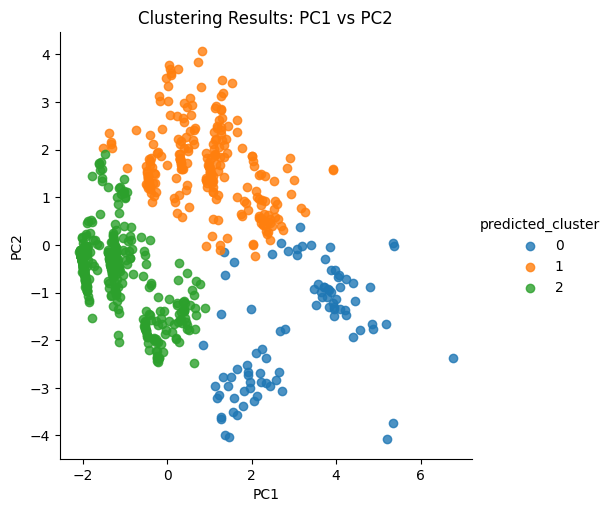

In [22]:
sns.lmplot(x="PC1", y="PC2", data=df_scaled_pca, hue="predicted_cluster", fit_reg=False)
plt.title('Clustering Results: PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

As we can clearly see form the PCA scatterplot above, the PCA has allowed us to see and distinguish the clusters much more effectively than our previous models. We can actually see that there is very little overlap of clusters and can help us reach a better and more informed understanding that what we were previously able to do.

##MISC
###Exporting

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
!cp "/content/drive/MyDrive/Colab Notebooks/A9_Moore_Devan.ipynb" ./
!jupyter nbconvert --to html "A9_Moore_Devan.ipynb"

[NbConvertApp] Converting notebook A9_Moore_Devan.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 650987 bytes to A9_Moore_Devan.html
